Alan Alfredo Onofre Chávez A01632858

In [13]:
# Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

Features:  324
Classes:  3
The max is:  20


C:\Users\alana\AppData\Local\Temp\ipykernel_26088\2485380507.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(1, 41), my_results, cmap=plt.cm.Set1, edgecolor="k")


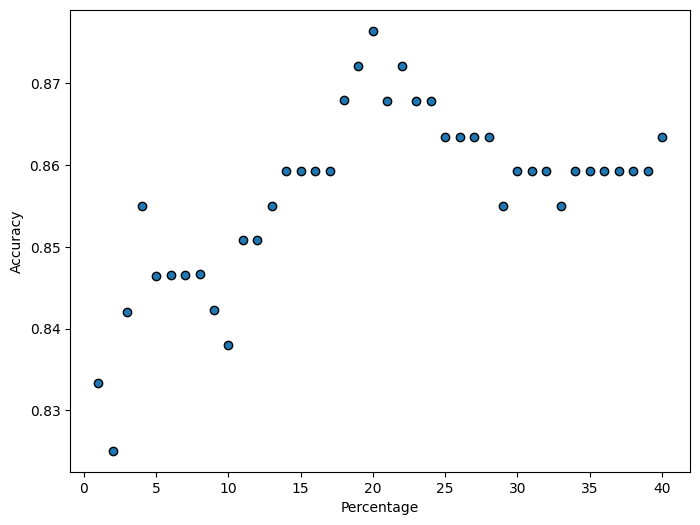

In [14]:
# Reading data
data = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\clasifcacion\mist_data\misterious_data_2.txt')
x = data[:,1:]
y = data[:,0]

# Getting information about misterious data
print('Features: ', len(x[0]))
print('Classes: ', len(set(y)))

my_results = []

for k in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf_results = cross_validate(clf, x, y, cv=5, scoring=('accuracy','recall_micro'))
    my_results.append(np.mean(clf_results['test_accuracy']))

plt.figure(5, figsize=(8, 6))
plt.clf()

plt.scatter(range(1, 41), my_results, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Percentage")
plt.ylabel("Accuracy")
print("The max is: ", list(range(1, 41))[my_results.index(max(my_results))])

The max is:  9.499999999999983e-05


C:\Users\alana\AppData\Local\Temp\ipykernel_26088\1547715148.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(r_history, my_results, cmap=plt.cm.Set1, edgecolor="k")


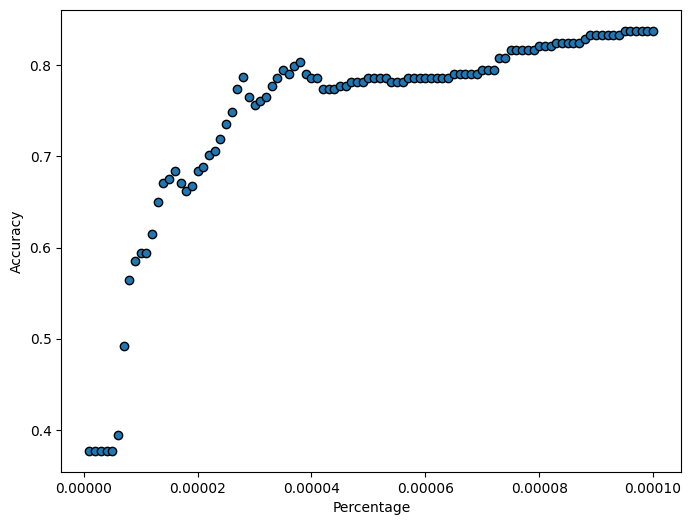

In [15]:
# Updating array
my_results = []
r_history = []

c_val = 0.000001
while c_val < 0.0001:
    clf = svm.SVC(kernel="linear", C=c_val) # Putting regulation parameter
    clf_results = cross_validate(clf, x, y, cv=5, scoring=('accuracy', 'recall_micro'))

    my_results.append(np.mean(clf_results['test_accuracy']))
    r_history.append(c_val)

    c_val += 0.000001

plt.figure(6, figsize=(8, 6))
plt.clf()

plt.scatter(r_history, my_results, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Percentage")
plt.ylabel("Accuracy")
print("The max is: ", list(r_history)[my_results.index(max(my_results))])

The max is:  8.199999999999987e-05


C:\Users\alana\AppData\Local\Temp\ipykernel_26088\3990781054.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(g_history, my_results, cmap=plt.cm.Set1, edgecolor="k")


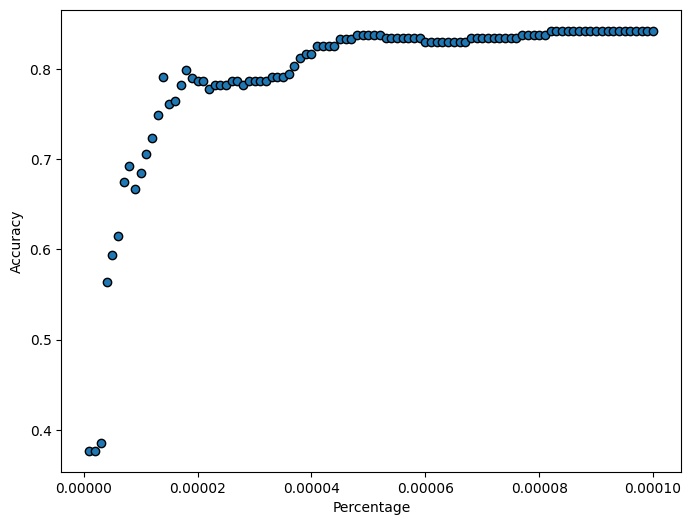

In [16]:
# Updating the arrays
my_results = []
g_history = []

g_val = 0.000001
while g_val <= 0.0001:
    clf = svm.SVC(kernel="rbf", gamma=g_val)
    clf_results = cross_validate(clf, x, y, cv=5, scoring=('accuracy', 'recall_micro'))

    my_results.append(np.mean(clf_results['test_accuracy']))
    g_history.append(g_val)

    g_val += 0.000001

plt.figure(7, figsize=(8, 6))
plt.clf()

plt.scatter(g_history, my_results, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Percentage")
plt.ylabel("Accuracy")
print("The max is: ", list(g_history)[my_results.index(max(my_results))])